In [ ]:
# Import Drive API and authenticate.
from google.colab import drive

# Mount your Drive to the Colab VM.
drive.mount('/gdrive')

Mounted at /gdrive


# Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing import image

In [ ]:
flower = r'/gdrive/My Drive/Colab Notebooks/Deep Learning Sem 7/Exp7(images)/flowerIMG.jpg'
dog = r'/gdrive/My Drive/Colab Notebooks/Deep Learning Sem 7/Exp7(images)/dog.jpg'
cat = r'/gdrive/My Drive/Colab Notebooks/Deep Learning Sem 7/Exp7(images)/cat.jpg'
car = r'/gdrive/My Drive/Colab Notebooks/Deep Learning Sem 7/Exp7(images)/car.jpg'

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

conv_base = VGG19(weights="imagenet",include_top=True)

In [ ]:
conv_base.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
def vgg19predict(img_loc):
  with image.load_img(img_loc, color_mode='rgb', target_size=(224, 224)) as img:
      x = image.img_to_array(img)
      x = np.expand_dims(x, axis=0)
      x = preprocess_input(x)

  features = conv_base.predict(x)

  predictions = decode_predictions(features)

  for pred in predictions[0]:
      print(f"{pred[1]}: {pred[2]:.2%}")


  plt.imshow(img)
  plt.axis('off')
  plt.show()

1/1 [==============================] - 0s 39ms/step
daisy: 95.27%
pot: 1.03%
picket_fence: 0.73%
ant: 0.49%
cabbage_butterfly: 0.40%


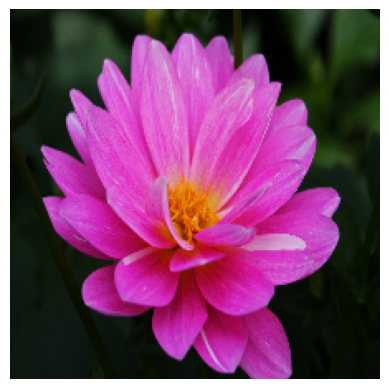

In [ ]:
vgg19predict(flower)

1/1 [==============================] - 0s 18ms/step
Egyptian_cat: 73.31%
tiger_cat: 9.90%
tabby: 8.06%
lynx: 5.33%
hare: 0.34%


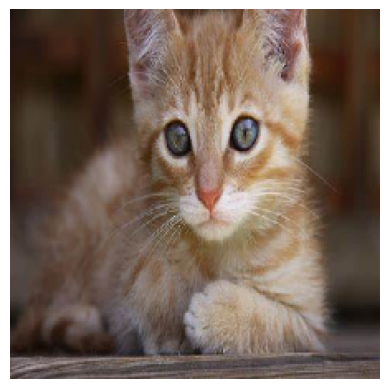

In [ ]:
vgg19predict(cat)

1/1 [==============================] - 0s 31ms/step
golden_retriever: 94.47%
Labrador_retriever: 4.78%
kuvasz: 0.39%
tennis_ball: 0.12%
soccer_ball: 0.11%


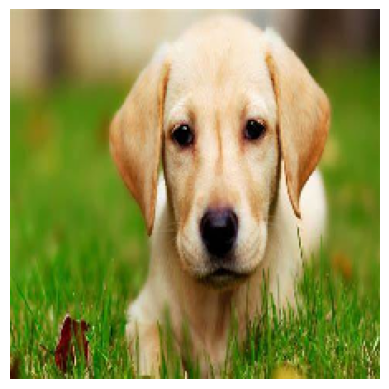

In [ ]:
vgg19predict(dog)

1/1 [==============================] - 0s 21ms/step
sports_car: 51.07%
racer: 24.98%
car_wheel: 9.85%
convertible: 3.74%
beach_wagon: 3.65%


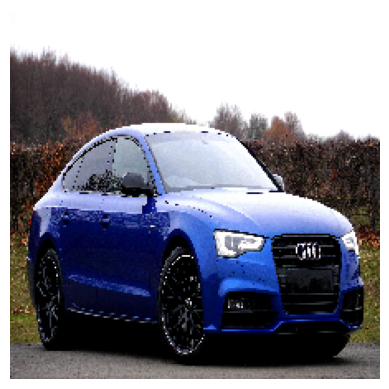

In [ ]:
vgg19predict(car)